In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load the red wine quality dataset
df = pd.read_csv('winequality-red.csv', sep=';')

# Drop any duplicate rows and rows with missing values
df = df.drop_duplicates()
df = df.dropna()

# Remove outliers using the interquartile range method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Scale the input features using MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
print(X_normalized)

# Split the dataset into input features (X) and target variable (y)
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
        'pH', 'sulphates', 'alcohol']]
y = df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.02, random_state=42)


[[0.31944444 0.65168539 0.         ... 0.77027027 0.35384615 0.14893617]
 [0.375      0.85393258 0.         ... 0.35135135 0.53846154 0.23404255]
 [0.375      0.71910112 0.05479452 ... 0.43243243 0.49230769 0.23404255]
 ...
 [0.11111111 0.48314607 0.1369863  ... 0.78378378 0.66153846 0.53191489]
 [0.11111111 0.58988764 0.16438356 ... 0.85135135 0.58461538 0.31914894]
 [0.125      0.21348315 0.64383562 ... 0.60810811 0.50769231 0.4893617 ]]


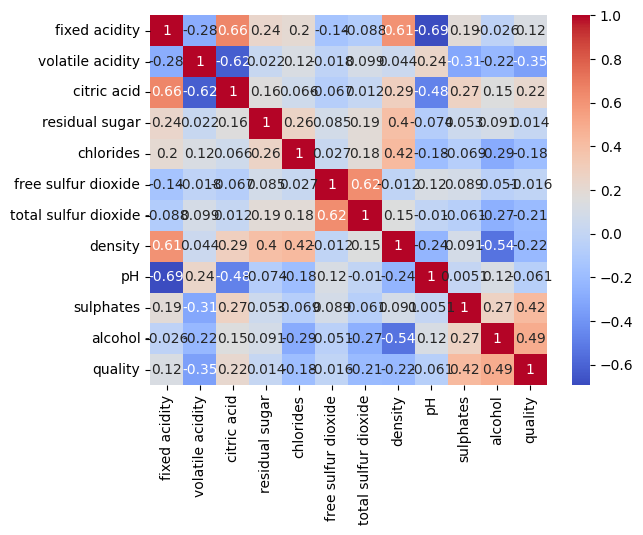

In [22]:
# Create a correlation matrix of input features
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

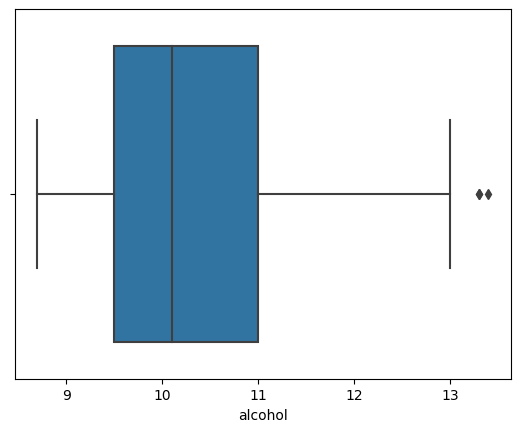

In [23]:
# Create a box plot of the "alcohol" feature
sns.boxplot(x='alcohol', data=df)
plt.show()

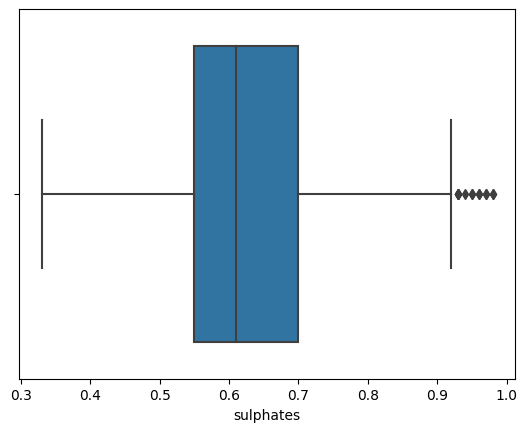

In [24]:
# Create a box plot of the "sulphates" feature
sns.boxplot(x='sulphates', data=df)
plt.show()

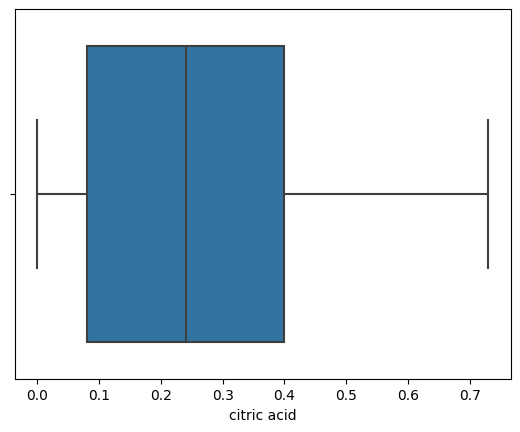

In [25]:
# Create a box plot of the "citric acid" feature
sns.boxplot(x='citric acid', data=df)
plt.show()

In [26]:
# Train a Random Forest classifier model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = rf.predict(X_test)

In [27]:
# Calculate the accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Define a list of different n_estimators to test
n_estimators_list = [10, 50, 150, 200, 250, 300, 350, 400, 450, 500]

# Initialize empty lists to store accuracy scores for each n_estimators value
accuracy_scores = []

# Loop through each n_estimators value and fit the model to the training data
for n_estimators in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

Accuracy: 0.8571428571428571


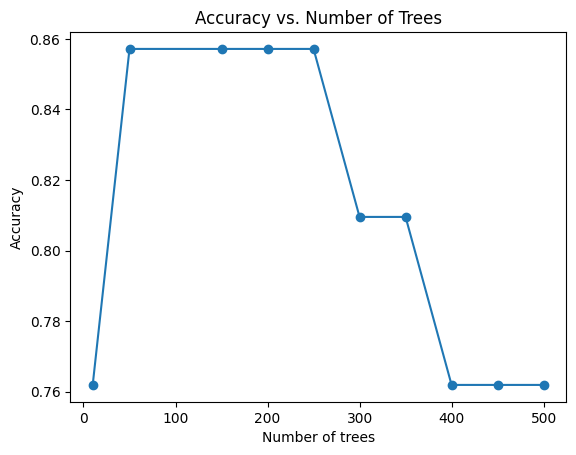

In [28]:
# Plot the accuracy scores for each n_estimators value
plt.plot(n_estimators_list, accuracy_scores, 'o-')
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Trees')
plt.show()

In [30]:
#Decision tree model implementation
from sklearn.tree import DecisionTreeClassifier

# Define a list of different max_depth values to test
max_depth_list = [1, 5, 10, 15, 20, 25]


# Loop through each max_depth value and fit the model to the training data
for max_depth in max_depth_list:
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
# Initialize empty lists to store accuracy scores for each max_depth value
accuracy_scores = []

# Loop through each max_depth value and fit the model to the training data
for max_depth in max_depth_list:
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"Accuracy for max_depth={max_depth}: {accuracy}")

Accuracy for max_depth=1: 0.6190476190476191
Accuracy for max_depth=5: 0.6190476190476191
Accuracy for max_depth=10: 0.6666666666666666
Accuracy for max_depth=15: 0.6190476190476191
Accuracy for max_depth=20: 0.47619047619047616
Accuracy for max_depth=25: 0.47619047619047616


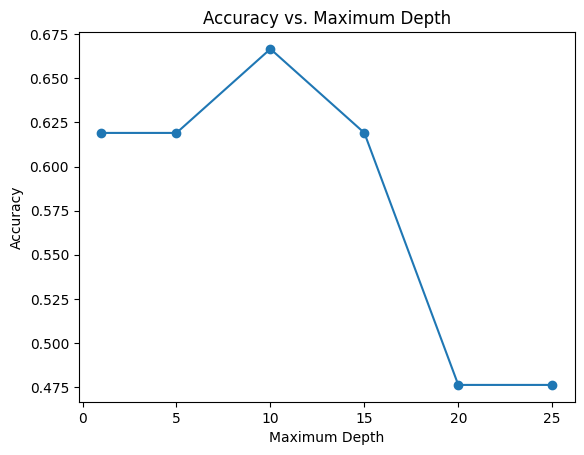

In [31]:
# Plot the accuracy scores for each max_depth value
plt.plot(max_depth_list, accuracy_scores, 'o-')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Maximum Depth')
plt.show()

In [33]:
#SVM model implementation
from sklearn.svm import SVC

# Define a list of different C values to test
C_list = [0.1, 1, 10, 100, 1000]

# Initialize empty lists to store accuracy scores for each C value
accuracy_scores = []

# Loop through each C value and fit the model to the training data
for C in C_list:
    svm = SVC(C=C, kernel='rbf', random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"Accuracy for C={C}: {accuracy}")

Accuracy for C=0.1: 0.6666666666666666
Accuracy for C=1: 0.7619047619047619
Accuracy for C=10: 0.8095238095238095
Accuracy for C=100: 0.7142857142857143
Accuracy for C=1000: 0.6190476190476191


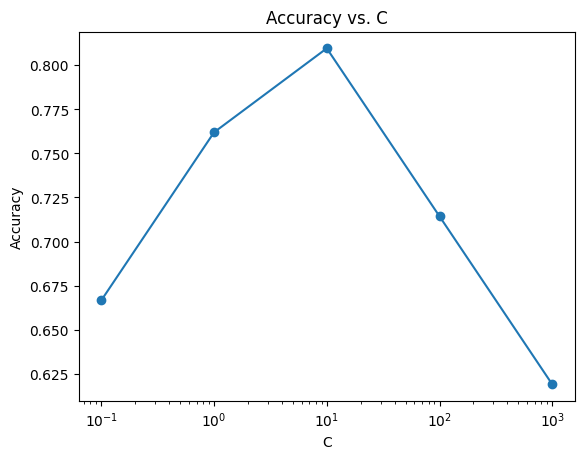

In [34]:
# Plot the accuracy scores for each C value
plt.plot(C_list, accuracy_scores, 'o-')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. C')
plt.xscale('log')
plt.show()

In [44]:
#KNN model implementation 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve

# Define a list of different k values to test
k_list = [1, 3, 5, 7, 9, 11, 13]

# Create a decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Define a range of training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve for the decision tree classifier
train_sizes, train_scores, test_scores = learning_curve(dt, X, y, train_sizes=train_sizes, cv=5)

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Initialize empty lists to store accuracy scores for each k value
accuracy_scores = []

# Loop through each k value and fit the model to the training data
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"Accuracy for K={k}: {accuracy}")

Accuracy for K=1: 0.6666666666666666
Accuracy for K=3: 0.7142857142857143
Accuracy for K=5: 0.7142857142857143
Accuracy for K=7: 0.8095238095238095
Accuracy for K=9: 0.9047619047619048
Accuracy for K=11: 0.8571428571428571
Accuracy for K=13: 0.8095238095238095


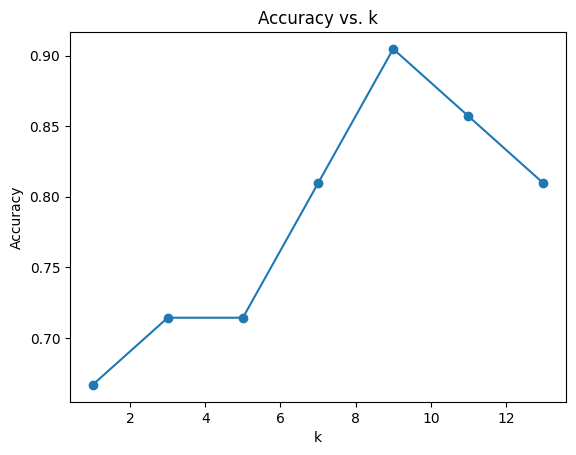

In [45]:
# Plot the accuracy scores for each k value
plt.plot(k_list, accuracy_scores, 'o-')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k')
plt.show()